# Basic column/row descriptive statistics

In [1]:
print('Hello World')

Hello World


In [2]:
#import required libraries

import zarr
import allel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/am59/miniconda3/envs/amrwams/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#open zarr file

data = zarr.open('/Volumes/Team112/ra4/pf_60_public_release/Pf_60_public_wg.final.zarr', mode = 'r')
data

<zarr.hierarchy.Group '/' read-only>

In [4]:
#check column names

list(data['variants'])

['AC',
 'ALT',
 'AN',
 'CDS',
 'CHROM',
 'DP',
 'FILTER_Centromere',
 'FILTER_InternalHypervariable',
 'FILTER_Low_VQSLOD',
 'FILTER_PASS',
 'FILTER_SubtelomericHypervariable',
 'FILTER_SubtelomericRepeat',
 'ID',
 'POS',
 'QUAL',
 'REF',
 'RegionType',
 'SNPEFF_AMINO_ACID_CHANGE',
 'SNPEFF_CODON_CHANGE',
 'SNPEFF_EFFECT',
 'SNPEFF_EXON_ID',
 'SNPEFF_FUNCTIONAL_CLASS',
 'SNPEFF_GENE_NAME',
 'SNPEFF_IMPACT',
 'SNPEFF_TRANSCRIPT_ID',
 'VQSLOD',
 'is_snp',
 'numalt',
 'svlen']

In [5]:
#create chunked table

data_variants = allel.VariantChunkedTable(data = data['variants'], names =  ['CHROM', 
                                                                             'POS', 
                                                                             'FILTER_PASS', 
                                                                             'SNPEFF_AMINO_ACID_CHANGE',
                                                                             'SNPEFF_CODON_CHANGE',
                                                                             'SNPEFF_EFFECT',
                                                                             'SNPEFF_EXON_ID',
                                                                             'SNPEFF_FUNCTIONAL_CLASS',
                                                                             'SNPEFF_GENE_NAME',
                                                                             'SNPEFF_IMPACT',
                                                                             'is_snp'])

data_variants

<VariantChunkedTable shape=(6051696,) dtype=[('CHROM', 'O'), ('POS', '<i4'), ('FILTER_PASS', '?'), ('SNPEFF_AMINO_ACID_CHANGE', 'O'), ('SNPEFF_CODON_CHANGE', 'O'), ('SNPEFF_EFFECT', 'O'), ('SNPEFF_EXON_ID', 'O'), ('SNPEFF_FUNCTIONAL_CLASS', 'O'), ('SNPEFF_GENE_NAME', 'O'), ('SNPEFF_IMPACT', 'O'), ('is_snp', '?')]
   nbytes=404.0M cbytes=51.4M cratio=7.9
   values=zarr.hierarchy.Group>

In [6]:
#remove last bit of header

data_2 = data_variants[:]
data_2

<VariantTable shape=(6051696,) dtype=(numpy.record, [('CHROM', 'O'), ('POS', '<i4'), ('FILTER_PASS', '?'), ('SNPEFF_AMINO_ACID_CHANGE', 'O'), ('SNPEFF_CODON_CHANGE', 'O'), ('SNPEFF_EFFECT', 'O'), ('SNPEFF_EXON_ID', 'O'), ('SNPEFF_FUNCTIONAL_CLASS', 'O'), ('SNPEFF_GENE_NAME', 'O'), ('SNPEFF_IMPACT', 'O'), ('is_snp', '?')])>
[('Pf3D7_01_v3',   30, False, '', '', 'INTERGENIC', '', 'NONE', '', 'MODIFIER', False)
 ('Pf3D7_01_v3',   37, False, '', '', 'INTERGENIC', '', 'NONE', '', 'MODIFIER', False)
 ('Pf3D7_01_v3',   58, False, '', '', 'INTERGENIC', '', 'NONE', '', 'MODIFIER', False)
 ... ('Pf_M76611', 5962, False, '', '', '', '', '', '', '',  True)
 ('Pf_M76611', 5963, False, '', '', '', '', '', '', '',  True)
 ('Pf_M76611', 5964, False, '', '', '', '', '', '', '',  True)]

In [7]:
#create an array that can be transformed into a pandas dataframe

data_3 = data_2.values
data_3

rec.array([('Pf3D7_01_v3',   30, False, '', '', 'INTERGENIC', '', 'NONE', '', 'MODIFIER', False),
           ('Pf3D7_01_v3',   37, False, '', '', 'INTERGENIC', '', 'NONE', '', 'MODIFIER', False),
           ('Pf3D7_01_v3',   58, False, '', '', 'INTERGENIC', '', 'NONE', '', 'MODIFIER', False),
           ...,
           ('Pf_M76611', 5962, False, '', '', '', '', '', '', '',  True),
           ('Pf_M76611', 5963, False, '', '', '', '', '', '', '',  True),
           ('Pf_M76611', 5964, False, '', '', '', '', '', '', '',  True)],
          dtype=[('CHROM', 'O'), ('POS', '<i4'), ('FILTER_PASS', '?'), ('SNPEFF_AMINO_ACID_CHANGE', 'O'), ('SNPEFF_CODON_CHANGE', 'O'), ('SNPEFF_EFFECT', 'O'), ('SNPEFF_EXON_ID', 'O'), ('SNPEFF_FUNCTIONAL_CLASS', 'O'), ('SNPEFF_GENE_NAME', 'O'), ('SNPEFF_IMPACT', 'O'), ('is_snp', '?')])

In [8]:
#create pandas dataframe

data_4 = pd.DataFrame(data_3)
data_4

,CHROM,POS,FILTER_PASS,SNPEFF_AMINO_ACID_CHANGE,SNPEFF_CODON_CHANGE,SNPEFF_EFFECT,SNPEFF_EXON_ID,SNPEFF_FUNCTIONAL_CLASS,SNPEFF_GENE_NAME,SNPEFF_IMPACT,is_snp
0,Pf3D7_01_v3,30,False,,,INTERGENIC,,NONE,,MODIFIER,False
1,Pf3D7_01_v3,37,False,,,INTERGENIC,,NONE,,MODIFIER,False
2,Pf3D7_01_v3,58,False,,,INTERGENIC,,NONE,,MODIFIER,False
3,Pf3D7_01_v3,65,False,,,INTERGENIC,,NONE,,MODIFIER,False
4,Pf3D7_01_v3,72,False,,,INTERGENIC,,NONE,,MODIFIER,False
5,Pf3D7_01_v3,79,False,,,INTERGENIC,,NONE,,MODIFIER,False
6,Pf3D7_01_v3,81,False,,,INTERGENIC,,NONE,,MODIFIER,False
7,Pf3D7_01_v3,84,False,,,INTERGENIC,,NONE,,MODIFIER,False
8,Pf3D7_01_v3,86,False,,,INTERGENIC,,NONE,,MODIFIER,False
9,Pf3D7_01_v3,88,False,,,INTERGENIC,,NONE,,MODIFIER,False


In [9]:
#calcute number of snps (unfiltered) in each x-some

pj = data_4['CHROM'].value_counts()
pj

Pf3D7_14_v3     785243
Pf3D7_13_v3     712411
Pf3D7_12_v3     585763
Pf3D7_11_v3     506946
Pf3D7_10_v3     450386
Pf3D7_09_v3     422575
Pf3D7_08_v3     406819
Pf3D7_07_v3     405044
Pf3D7_06_v3     358316
Pf3D7_04_v3     356420
Pf3D7_05_v3     295852
Pf3D7_03_v3     287600
Pf3D7_02_v3     263082
Pf3D7_01_v3     208276
Pf3D7_API_v3      5523
Pf_M76611         1440
Name: CHROM, dtype: int64

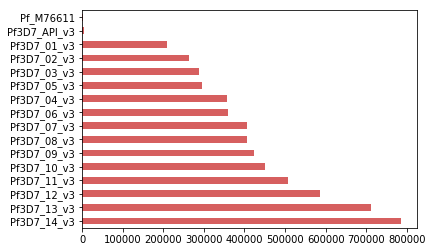

In [10]:
#make a plot of the counts

data_4['CHROM'].value_counts().plot(kind='barh', color='#d65f5f')

In [11]:
#Determine the number of snps that for each x-some, passed the filter test

gj = data_4.groupby(['CHROM', 'FILTER_PASS'])['is_snp'].count()
gj

CHROM         FILTER_PASS
Pf3D7_01_v3   False          136651
              True            71625
Pf3D7_02_v3   False          154370
              True           108712
Pf3D7_03_v3   False          154877
              True           132723
Pf3D7_04_v3   False          216241
              True           140179
Pf3D7_05_v3   False          111296
              True           184556
Pf3D7_06_v3   False          193410
              True           164906
Pf3D7_07_v3   False          230411
              True           174633
Pf3D7_08_v3   False          225673
              True           181146
Pf3D7_09_v3   False          208073
              True           214502
Pf3D7_10_v3   False          226610
              True           223776
Pf3D7_11_v3   False          217006
              True           289940
Pf3D7_12_v3   False          293135
              True           292628
Pf3D7_13_v3   False          290691
              True           421720
Pf3D7_14_v3   False          275299
  

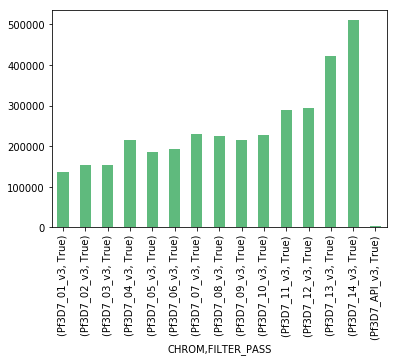

In [12]:
#generate a plot

gj.groupby('FILTER_PASS').plot.bar( color=['#5fba7d']);

In [13]:
#count number of intergenic snps

data_4['SNPEFF_EFFECT']

0          INTERGENIC
1          INTERGENIC
2          INTERGENIC
3          INTERGENIC
4          INTERGENIC
5          INTERGENIC
6          INTERGENIC
7          INTERGENIC
8          INTERGENIC
9          INTERGENIC
10         INTERGENIC
11         INTERGENIC
12         INTERGENIC
13         INTERGENIC
14         INTERGENIC
15         INTERGENIC
16         INTERGENIC
17         INTERGENIC
18         INTERGENIC
19         INTERGENIC
20         INTERGENIC
21         INTERGENIC
22         INTERGENIC
23         INTERGENIC
24         INTERGENIC
25         INTERGENIC
26         INTERGENIC
27         INTERGENIC
28         INTERGENIC
29         INTERGENIC
              ...    
6051666              
6051667              
6051668              
6051669              
6051670              
6051671              
6051672              
6051673              
6051674              
6051675              
6051676              
6051677              
6051678              
6051679              
6051680   

In [14]:
#count number of intergenic snps

data_4['SNPEFF_EFFECT'].count()

6051696

# END.